### Introduction

In this part of the analysis, we build upon the clustering results obtained in the first step, where we identified groups using the best-performing clustering method for this dataset. We then compared two algorithms, Random Forest and Gradient Boosting, to develop an effective classification algorithm capable of assigning individuals to the identified groups based on their responses. Random Forest was chosen for its robustness, interpretability, and ability to handle diverse data types, while Gradient Boosting was selected for its strong predictive performance and capacity to capture non-linear relationships. Finally, we optimized the number of questions used in the classification process by analyzing feature importance and iteratively reducing the feature set to achieve the best trade-off between performance and simplicity. This step ensures that the resulting algorithm remains both efficient and accurate, providing a practical solution for future use with minimal inputs.

## IMPORT ##

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



## Data Loading ##

In [13]:
file_path = "fic_epita_kantar_codes.csv"
data_codes = pd.read_csv(file_path, sep=';')

**Select relevant columns**

In [14]:
columns_of_interest = [
    "A9_1_slice", "A9_2_slice", "A9_3_slice", "A9_4_slice", "A9_5_slice",
    "A9_6_slice", "A9_7_slice", "A9_8_slice", "A9_9_slice", "A9_10_slice",
    "A9_11_slice", "A9_12_slice", "A9_13_slice", "A9_14_slice", "A9_15_slice",
    "A9_16_slice", "A10_1_slice", "A10_2_slice", "A10_3_slice", "A10_4_slice",
    "A10_5_slice", "A10_6_slice", "A10_7_slice", "A10_8_slice",
    "A11_1_slice", "A11_2_slice", "A11_3_slice", "A11_4_slice", "A11_5_slice",
    "A11_6_slice", "A11_7_slice", "A11_8_slice", "A11_9_slice", "A11_10_slice",
    "A11_11_slice", "A11_12_slice", "A11_13_slice"
]
subset_data = data_codes[columns_of_interest]

## Adding the cluster column using the best algo with the best number of cluster found in part 1 ##

In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data.fillna(0))  # Replace missing values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data
subset_data['cluster'] = kmeans_labels


/tmp/ipykernel_131606/3220641698.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['cluster'] = kmeans_labels


## Training Random Forest ##

In [16]:
# Define features (golden questions) and target (clusters)
X = subset_data.drop(columns=['cluster'])
y = subset_data['cluster']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       262
           1       0.98      0.90      0.94       184
           2       0.95      0.96      0.96       554

    accuracy                           0.95      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.95      0.95      0.95      1000



## Training Gradient Boosting ##

In [17]:
# Define features (questions) and target (clusters)
X2 = subset_data.drop(columns=['cluster'])
y2 = subset_data['cluster']

# Split into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train and Evaluate model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train2, y_train2)
y_pred2 = gb.predict(X_test2)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       262
           1       0.98      0.90      0.94       184
           2       0.95      0.96      0.96       554

    accuracy                           0.95      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.95      0.95      0.95      1000



## Getting the importance of each question ##

**For random forest**

In [18]:
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Top Questions) for Random Forest:\n", importance_df)

Feature Importance (Top Questions) for Random Forest:
          Feature  Importance
33  A11_10_slice    0.083317
30   A11_7_slice    0.071852
28   A11_5_slice    0.071477
26   A11_3_slice    0.056607
31   A11_8_slice    0.052130
7     A9_8_slice    0.043957
13   A9_14_slice    0.040699
36  A11_13_slice    0.039214
20   A10_5_slice    0.038229
3     A9_4_slice    0.035639
34  A11_11_slice    0.035226
2     A9_3_slice    0.029591
1     A9_2_slice    0.029545
0     A9_1_slice    0.026178
24   A11_1_slice    0.023914
25   A11_2_slice    0.022092
9    A9_10_slice    0.021260
32   A11_9_slice    0.020025
35  A11_12_slice    0.019942
27   A11_4_slice    0.019370
16   A10_1_slice    0.018899
6     A9_7_slice    0.018642
10   A9_11_slice    0.017545
15   A9_16_slice    0.016899
12   A9_13_slice    0.016795
11   A9_12_slice    0.016338
14   A9_15_slice    0.016270
22   A10_7_slice    0.014869
23   A10_8_slice    0.013685
8     A9_9_slice    0.011098
29   A11_6_slice    0.009880
19   A10_4_slice 

**For Gradient Boosting**

In [19]:
feature_importance2 = gb.feature_importances_
importance_df2 = pd.DataFrame({
    'Feature': X2.columns,
    'Importance': feature_importance2
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Top Questions) for Gradiant Boosting:\n", importance_df2)

Feature Importance (Top Questions) for Gradiant Boosting:
          Feature  Importance
28   A11_5_slice    0.140620
30   A11_7_slice    0.112928
33  A11_10_slice    0.098550
7     A9_8_slice    0.064707
26   A11_3_slice    0.060625
31   A11_8_slice    0.055011
13   A9_14_slice    0.048094
3     A9_4_slice    0.043571
34  A11_11_slice    0.042199
36  A11_13_slice    0.037003
20   A10_5_slice    0.036868
0     A9_1_slice    0.031365
2     A9_3_slice    0.030072
1     A9_2_slice    0.028438
16   A10_1_slice    0.023673
35  A11_12_slice    0.017286
27   A11_4_slice    0.015426
9    A9_10_slice    0.014880
24   A11_1_slice    0.014104
6     A9_7_slice    0.013802
10   A9_11_slice    0.012057
25   A11_2_slice    0.011214
12   A9_13_slice    0.008521
32   A11_9_slice    0.007891
15   A9_16_slice    0.006086
22   A10_7_slice    0.005294
14   A9_15_slice    0.005157
23   A10_8_slice    0.002945
19   A10_4_slice    0.002839
17   A10_2_slice    0.002215
11   A9_12_slice    0.001998
8     A9_9_sl

## Finding performance when lowering question amount ##

**For random forest**

In [20]:
results = []
for i in range(1, len(importance_df) + 1):
    top_features = importance_df['Feature'].head(i)
    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]
    
    rf_reduced = RandomForestClassifier(random_state=42)
    rf_reduced.fit(X_train_reduced, y_train)
    y_pred_reduced = rf_reduced.predict(X_test_reduced)
    
    acc = accuracy_score(y_test, y_pred_reduced)
    results.append({'Num_Features': i, 'Accuracy': acc})

results_df = pd.DataFrame(results)
print(results_df)

    Num_Features  Accuracy
0              1     0.730
1              2     0.749
2              3     0.795
3              4     0.800
4              5     0.806
5              6     0.830
6              7     0.836
7              8     0.836
8              9     0.841
9             10     0.875
10            11     0.881
11            12     0.882
12            13     0.889
13            14     0.893
14            15     0.903
15            16     0.901
16            17     0.906
17            18     0.902
18            19     0.906
19            20     0.919
20            21     0.925
21            22     0.929
22            23     0.937
23            24     0.939
24            25     0.942
25            26     0.942
26            27     0.944
27            28     0.940
28            29     0.947
29            30     0.950
30            31     0.948
31            32     0.948
32            33     0.956
33            34     0.955
34            35     0.957
35            36     0.951
3

**For Gradient Boosting**

In [21]:
results2 = []
for i in range(1, len(importance_df2) + 1):
    top_features2 = importance_df2['Feature'].head(i)
    X_train_reduced2 = X_train2[top_features2]
    X_test_reduced2 = X_test2[top_features2]
    
    gb_reduced = GradientBoostingClassifier(random_state=42)
    gb_reduced.fit(X_train_reduced2, y_train2)
    y_pred_reduced2 = gb_reduced.predict(X_test_reduced2)
    
    acc = accuracy_score(y_test2, y_pred_reduced2)
    results2.append({'Num_Features': i, 'Accuracy': acc})

results_df2 = pd.DataFrame(results2)
print(results_df2)


    Num_Features  Accuracy
0              1     0.752
1              2     0.750
2              3     0.796
3              4     0.825
4              5     0.838
5              6     0.851
6              7     0.859
7              8     0.865
8              9     0.888
9             10     0.896
10            11     0.899
11            12     0.906
12            13     0.910
13            14     0.914
14            15     0.918
15            16     0.918
16            17     0.923
17            18     0.921
18            19     0.920
19            20     0.929
20            21     0.929
21            22     0.937
22            23     0.947
23            24     0.949
24            25     0.952
25            26     0.951
26            27     0.945
27            28     0.952
28            29     0.953
29            30     0.955
30            31     0.959
31            32     0.955
32            33     0.959
33            34     0.961
34            35     0.956
35            36     0.956
3

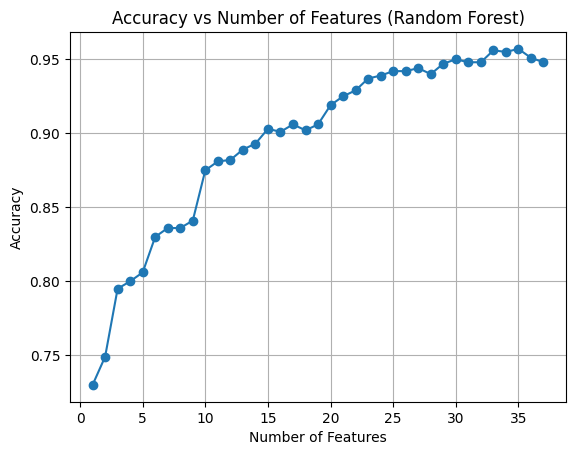

In [22]:
plt.plot(results_df['Num_Features'], results_df['Accuracy'], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Features (Random Forest)")
plt.grid()
plt.show()

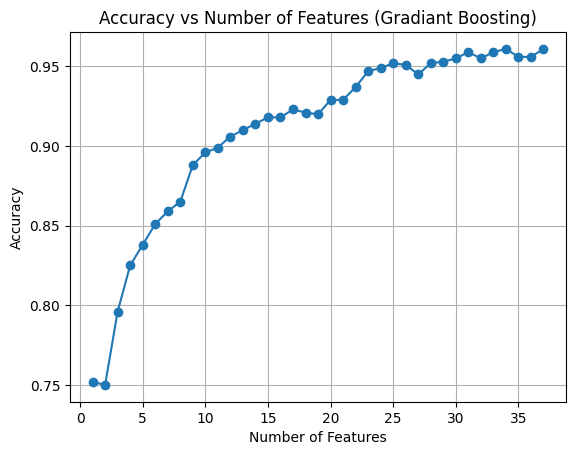

In [23]:
plt.plot(results_df2['Num_Features'], results_df2['Accuracy'], marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Features (Gradiant Boosting)")
plt.grid()
plt.show()


### Conclusion

Both Random Forest and Gradient Boosting are similarly effective, with Gradient Boosting being slightly better in terms of accuracy. Therefore, the optimal choice is Gradient Boosting.

Using 23 features results in an accuracy nearing 95%, striking the best balance between performance and complexity. Beyond that, the improvements in accuracy become minimal, and the model starts to slow down, making it the optimal choice for maximizing classification performance while maintaining efficiency.